### **1. Data Preparation**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier

from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Suppress warnings to enhance readability
warnings.filterwarnings("ignore")

# Enable inline plotting for matplotlib
%matplotlib inline

# Display all columns when using pandas DataFrames
pd.options.display.max_columns = None

In [2]:
# Load a bank marketing dataset
df = pd.read_csv("bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Rename the column of y into subscribed
df.rename(columns={"y":"subscribed"}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Check the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  subscribed  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Check if there any duplicate values
df.duplicated().sum()

0

In [8]:
# Check the shape of the dataset
print(f"There are {df.shape[0]:,} rows and {df.shape[1]:,} columns")

There are 45,211 rows and 17 columns


### **2. Data Understanding**

The initial dataset contains `45,211` rows, `16` features, and `1` target label (`subscribed or not`)

| __No__ | __Feature Name__ | __Explanation__ | __Data Type__ |
| :-: | :- | :- | :- |
| 1 | Age | Age of customer | numerical: integer | 
| 2 | Job | Occupation of customer:  'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown' | categorical |
| 3 | Marital | Marital status: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed | categorical |
| 4 | Education | Education level of customer: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown' | categorical |
| 5 | Default | Indicating whether the customer has credit in default? (Yes/No) | categorical |
| 6 | Balance | Average yearly balance | numerical: integer |
| 7 | Housing | Indicating whether the customer has housing loan? (Yes/No) | categorical |
| 8 | Loan | Indicating whether the customer has personal loan? (Yes/No) | categorical |
| 9 | Contact | Contact communication type ('cellular','telephone') | categorical |
| 10 | Day | Last contact day of the week | numerical: integer |
| 11 | Month | Last contact month of year: 'jan', 'feb', 'mar', ..., 'nov', 'dec' | categorical |
| 12 | Duration | Last contact duration, in seconds | numerical: integer |
| 13 | Campaign | Number of contacts performed during this campaign and for this client (includes last contact) | numerical: integer |
| 14 | PDays | Number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) | numerical: integer |
| 15 | Previous | Number of contacts performed before this campaign and for this client | numerical: integer |
| 16 | POutcome | Outcome of the previous marketing campaign ('failure','nonexistent','success') | categorical |
| 17 | Subscribed | Indicating whether has the client subscribed a term deposit? (Yes/No) | categorical |

* __Target Feature__: Subscribed
* __Numerical Features__: Age, Balance, Day, Duration, Campaign, PDays, Previous
* __Categorical Features__: Job, Marital, Education, Default, Housing, Loan, Contact, Month, POutcome

### **3. Explatory Data Analysis**

In [9]:
# Create lists for differentiate between numerical and categorical columns
numerical_cols = list(df.select_dtypes(include="number").columns)
categorical_cols = list(df.select_dtypes(include="object").columns)

In [10]:
# Display the statistical summary of the datset
display(df[numerical_cols].describe().round(2).T, df[categorical_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.94,10.62,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.27,3044.77,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.81,8.32,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.16,257.53,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.76,3.10,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.20,100.13,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.58,2.30,0.0,0.0,0.0,0.0,275.0


,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
subscribed,45211,2,no,39922


In [11]:
# Initialize an empty list to store information about each column in the DataFrame
df_items = []

# Iterate through each column in the DataFrame
for col in df.columns:
    # Calculate the number of null values in the column
    null_count = df[col].isna().sum()
    
    # Calculate the percentage of null values in the column
    null_percentage = round((null_count / len(df[col])) * 100, 2)
    
    # Determine the number of unique values in the column
    unique_values = df[col].nunique()
    
    # Create a list of 30 sample values from the column
    sample_values = [*set(df[col].sample(30).values)]
    
    # Append information about the column to the list
    df_items.append([col, df[col].dtype, null_count, null_percentage, unique_values, sample_values])

# Create a DataFrame from the list of column information
df_desc = pd.DataFrame(data=df_items, columns=["feature", "data_type", "null", "%null", "n_unique", "sample"])

# Display the resulting DataFrame containing column statistics
df_desc

,feature,data_type,null,%null,n_unique,sample
0,age,int64,0,0.0,77,"[28, 30, 31, 32, 33, 35, 36, 37, 38, 40, 42, 4..."
1,job,object,0,0.0,12,"[retired, admin., management, blue-collar, tec..."
2,marital,object,0,0.0,3,"[single, divorced, married]"
3,education,object,0,0.0,4,"[primary, tertiary, secondary, unknown]"
4,default,object,0,0.0,2,[no]
5,balance,int64,0,0.0,7168,"[0, 2, 8, 2830, 527, 654, 14, 152, 410, 1696, ..."
6,housing,object,0,0.0,2,"[yes, no]"
7,loan,object,0,0.0,2,"[yes, no]"
8,contact,object,0,0.0,3,"[cellular, unknown, telephone]"
9,day,int64,0,0.0,31,"[2, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 20..."


In [4]:
# Define age groups and corresponding bins
age_group = ['18-30', '31-45', '46-60', '>60']
age_bins = [18, 30, 45, 60, np.inf]

# Create a new column 'age_group' in the DataFrame based on age bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_group, include_lowest=True)

In [5]:
# Create a new column 'contacted' in the DataFrame based on a condition related to the 'pdays' column
# If 'pdays' is greater than or equal to 0, set 'contacted' to "yes"; otherwise, set it to "no"
df["contacted"] = np.where(df["pdays"] >= 0, "yes", "no")

In [6]:
# Convert the 'subscribed' column to binary integers in the DataFrame
# If 'subscribed' is equal to "yes", the corresponding value is set to 1; otherwise, it is set to 0
df["subscribed"] = (df["subscribed"] == "yes").astype(int)

In [15]:
# Create a list of column names containing numerical data in the DataFrame
numerical_cols = list(df.select_dtypes(include="number").columns)

# Remove the 'subscribed' column from the list, assuming it's the target variable
numerical_cols.remove('subscribed')

# Display the final list of numerical columns
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [16]:
# Create a list of column names containing categorical data in the DataFrame
categorical_cols = list(df.select_dtypes(include=["object", "category"]).columns)
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'age_group',
 'contacted']

In [17]:
# Display the statistical summary of the datset
display(df[numerical_cols].describe().round(2).T, df[categorical_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.94,10.62,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.27,3044.77,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.81,8.32,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.16,257.53,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.76,3.10,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.20,100.13,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.58,2.30,0.0,0.0,0.0,0.0,275.0


,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
age_group,45211,4,31-45,23733


In [18]:
# Count the occurrences of each unique value in the 'subscribed' column
# This creates a Series with counts for each unique value
subscribed_counts = df["subscribed"].value_counts()

# Display the counts of 'subscribed' values (e.g., the number of 'yes' and 'no' occurrences)
subscribed_counts

subscribed
0    39922
1     5289
Name: count, dtype: int64

In [19]:
# Set the style of graphic plot using ggplot theme
plt.style.use('ggplot')

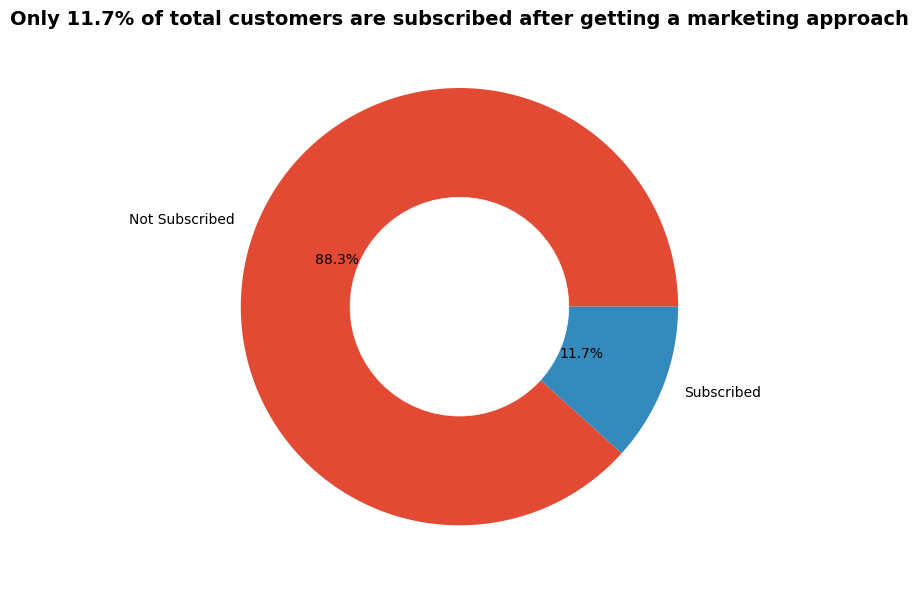

In [20]:
# Create a white circle to make a donut chart
donut_circle = plt.Circle((0, 0), 0.5, color="white")

plt.figure(figsize=(8, 6))

# Create a pie chart based on the counts of 'subscribed' values
plt.pie(subscribed_counts, labels=["Not Subscribed", "Subscribed"], autopct='%1.1f%%')

# Add the white circle to create the donut chart effect
plt.gcf().gca().add_artist(donut_circle)
plt.title("Only 11.7% of total customers are subscribed after getting a marketing approach", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

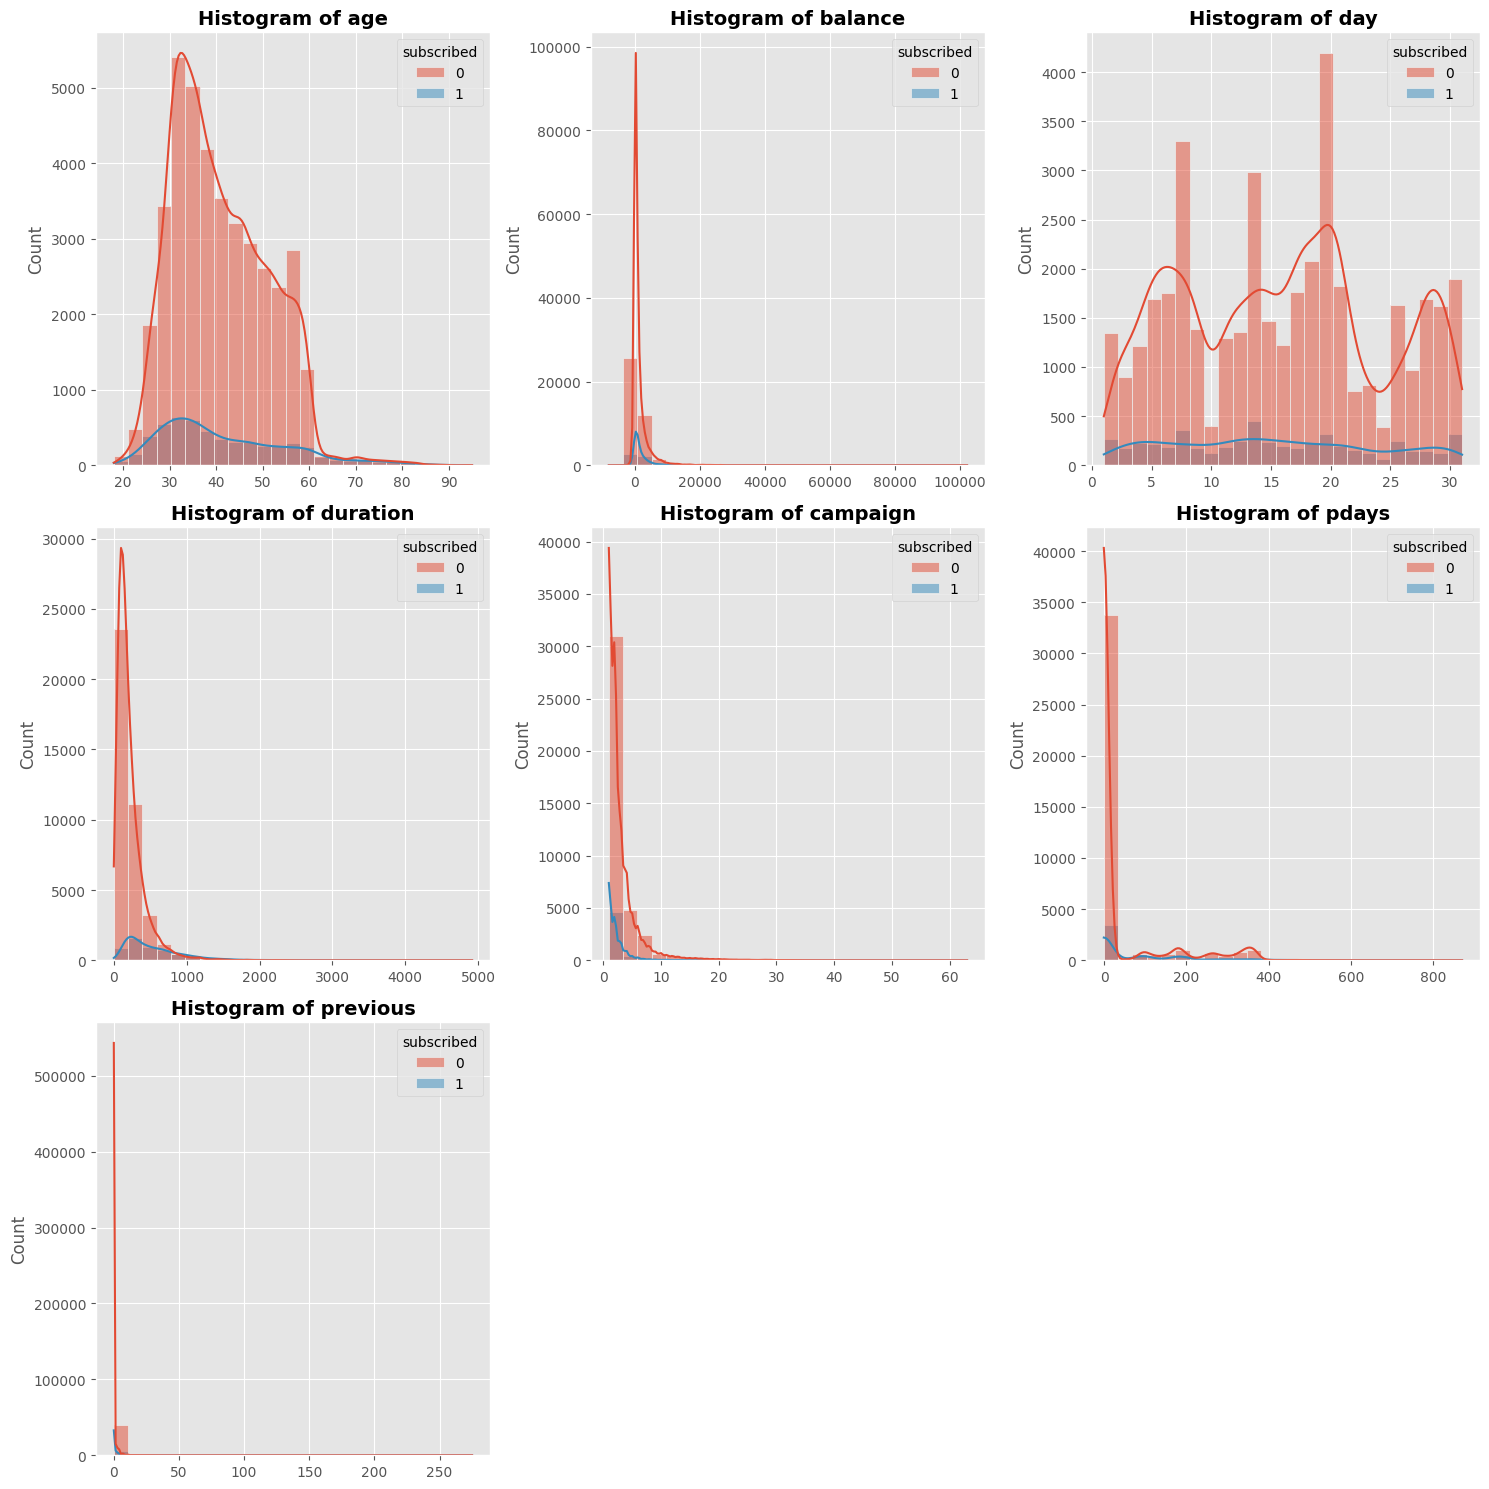

In [21]:
# Create a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each column and create a histogram
for ax, col in zip(axes, numerical_cols):
    sns.histplot(data=df, x=col, ax=ax, hue="subscribed", kde=True, bins=25, alpha=0.50)
    ax.set_title(f"Histogram of {col}", fontsize=14, weight="bold")
    ax.set_xlabel('')

# Remove the remaining empty subplots (if any)
for ax in axes[len(numerical_cols):]:
    fig.delaxes(ax)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

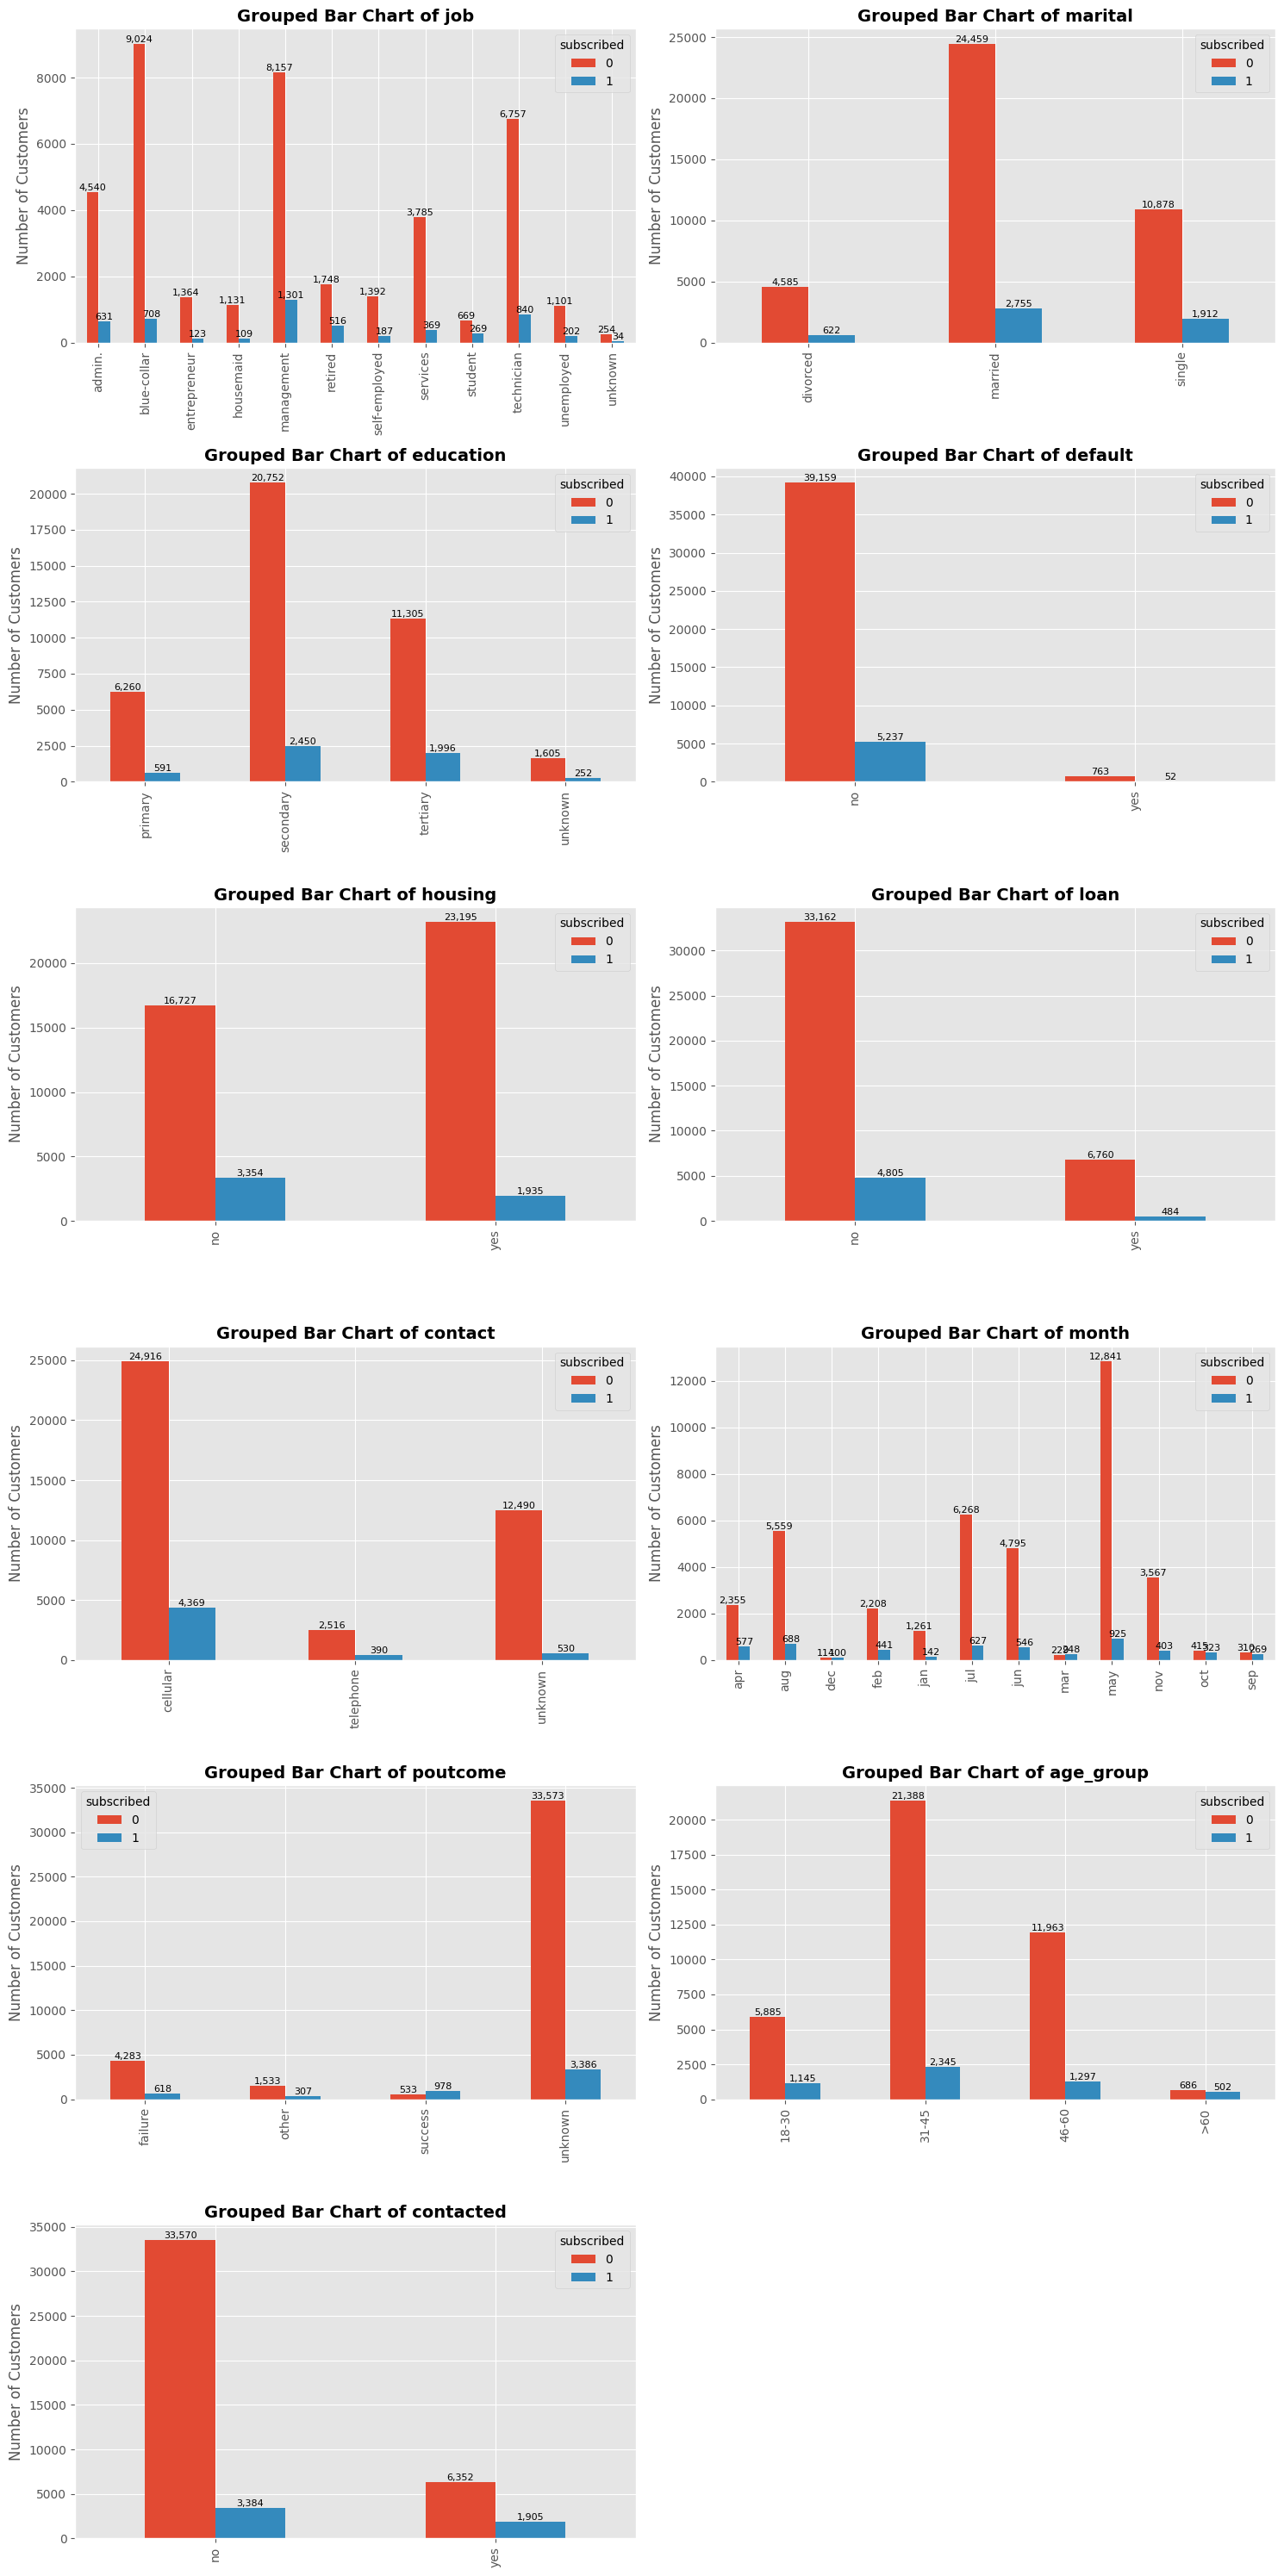

In [49]:
# Create a grid of subplots
fig, axes = plt.subplots(6, 2, figsize=(15, 30))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    # Group by 'subscribed' and count occurrences for each subgroup
    subgroup_counts = df.groupby([col, 'subscribed']).size().unstack().fillna(0)

    # Plotting the grouped bar chart
    subgroup_counts.plot(kind='bar', ax=ax)

    ax.set_title(f"Grouped Bar Chart of {col}", fontsize=14, weight="bold")
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel('Number of Customers')

    # Adding data labels above the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.text(x + width / 2, y + height + 0.05, f'{height:,}', ha='center', va='bottom', fontsize=8)

# Remove empty subplots
for ax in axes[len(categorical_cols):]:
    fig.delaxes(ax)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

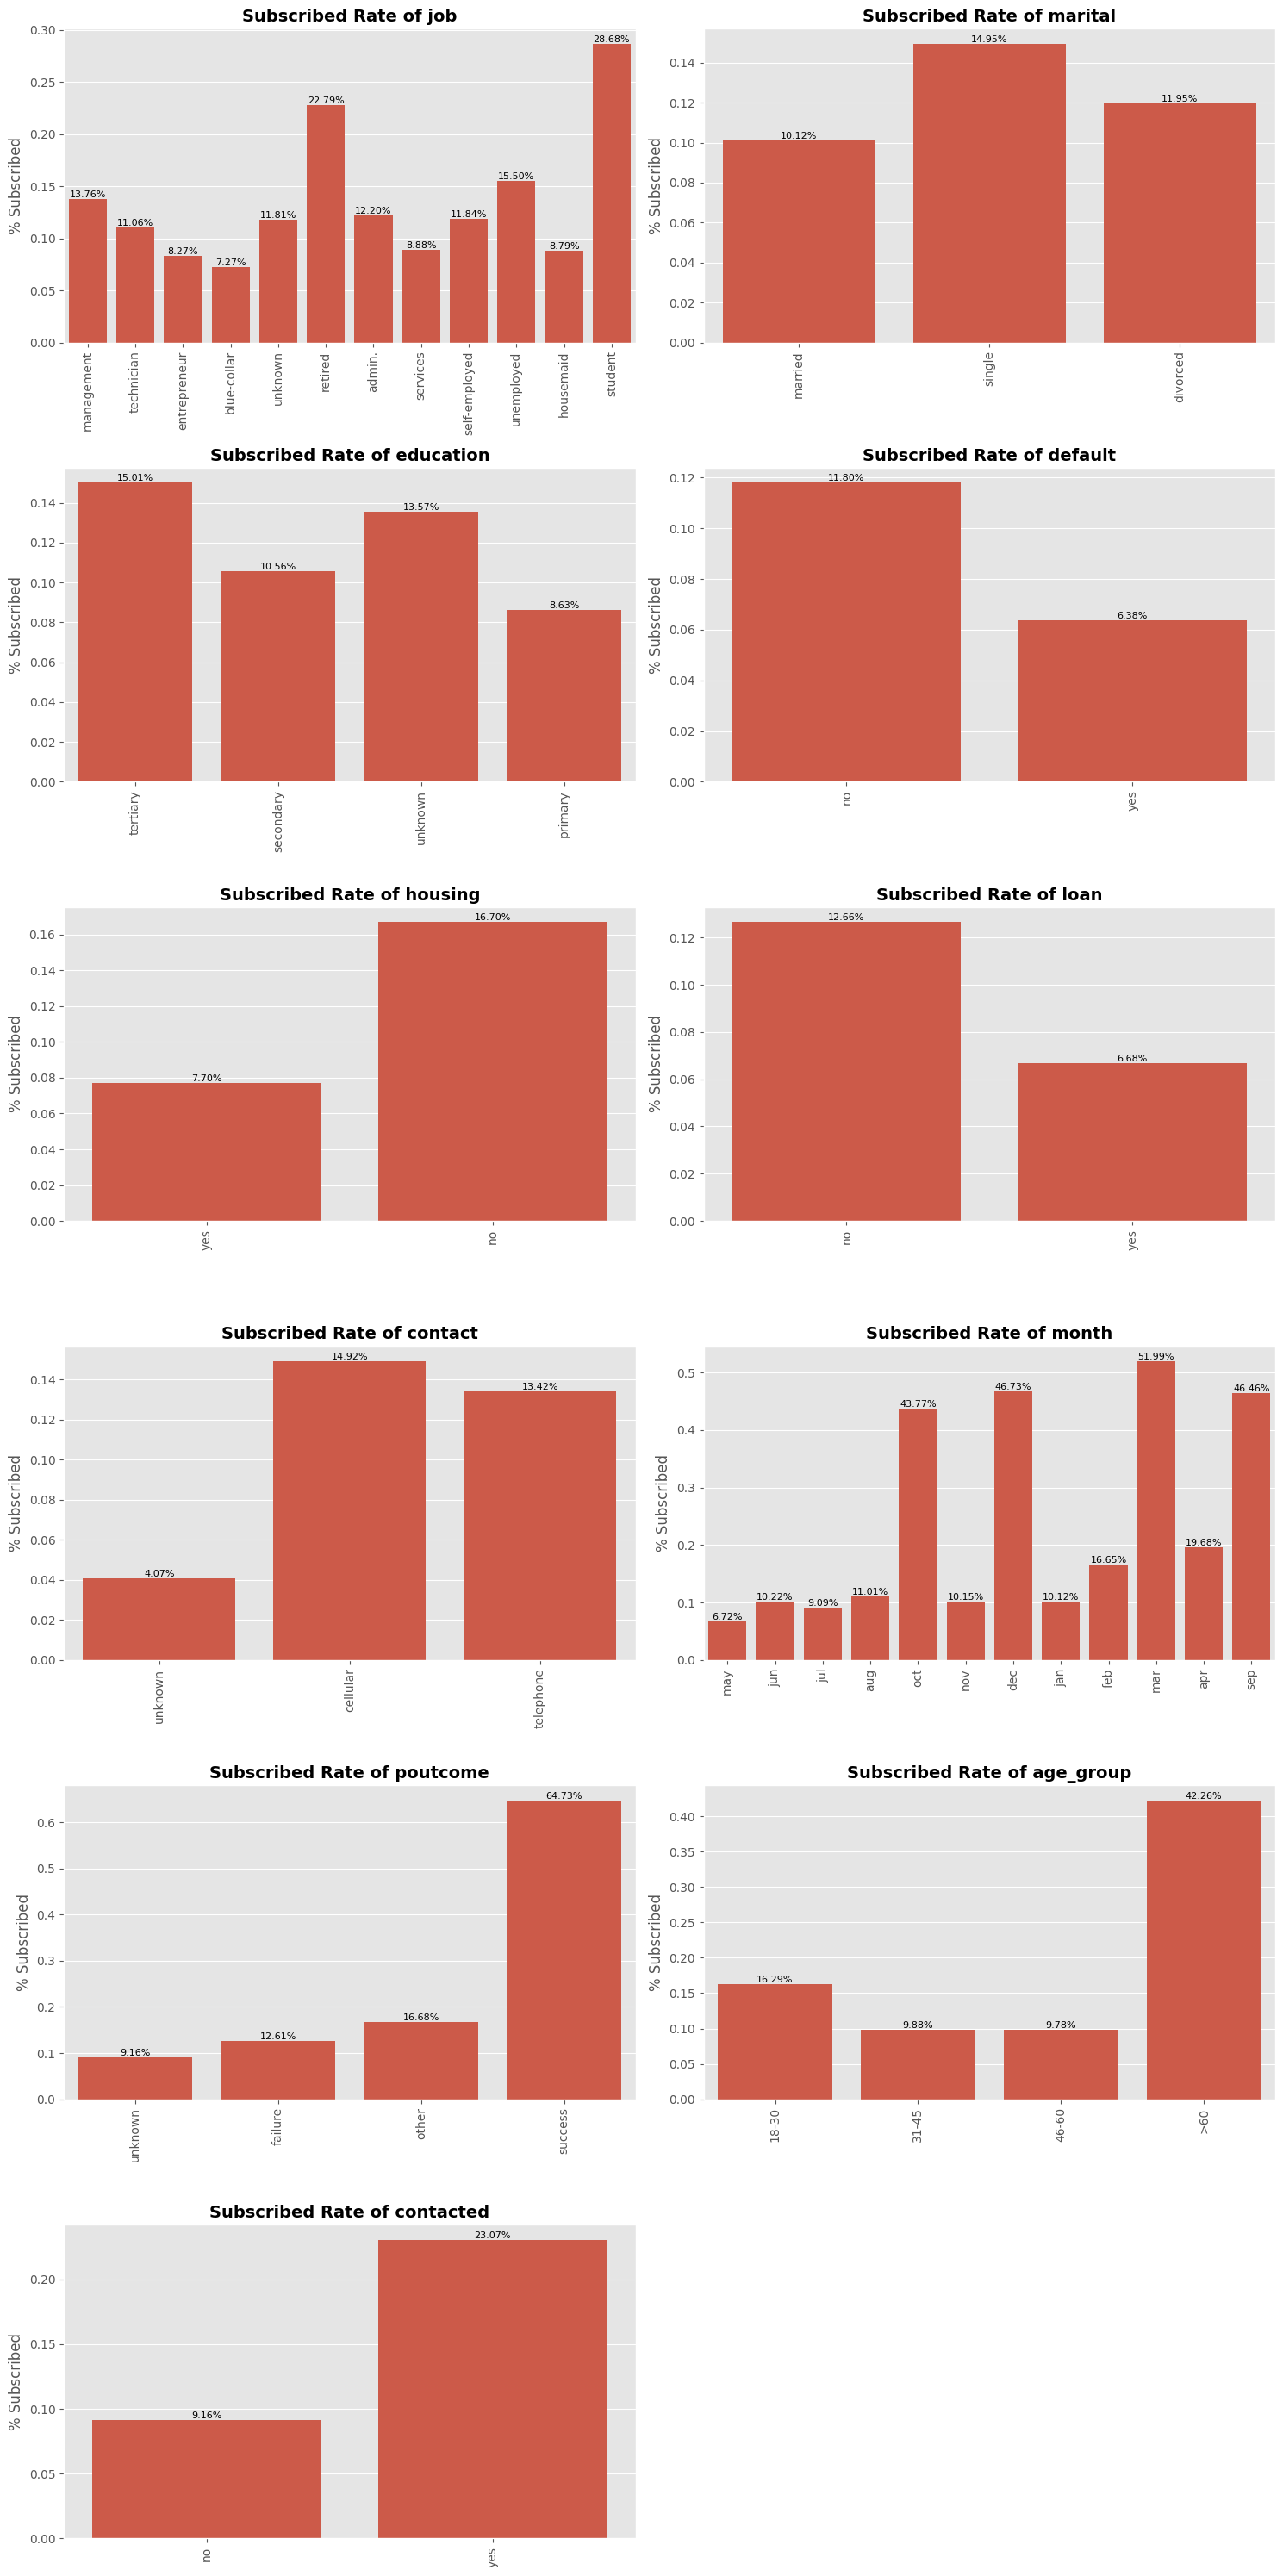

In [23]:
# Create a grid of subplots
fig, axes = plt.subplots(6, 2, figsize=(15, 30))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each categorical column and create a bar plot
for ax, col in zip(axes, categorical_cols):
    # Create a bar plot for the 'subscribed' rate based on the current categorical column
    sns.barplot(x=col, y="subscribed", data=df, ci=None, ax=ax)

    # Set title for the subplot
    ax.set_title(f"Subscribed Rate of {col}", fontsize=14, weight="bold")
    
    # Set xlabel to an empty string for better readability
    ax.set_xlabel('')
    
    # Rotate x-axis labels for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    # Set ylabel as '% Subscribed'
    ax.set_ylabel('% Subscribed')

    # Adding data labels on top of the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x + width / 2, y + height, f'{height:.2%}', ha='center', va='bottom', fontsize=8)

# Remove empty subplots for cases where there are fewer than 12 categorical columns
for ax in axes[len(categorical_cols):]:
    fig.delaxes(ax)

# Adjust layout to prevent subplot overlap
plt.tight_layout()
plt.show()

In [24]:
# Create a copy of the DataFrame for modelling
df_model = df.copy()
df_model.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_group,contacted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,46-60,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,31-45,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,31-45,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,46-60,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,31-45,no


In [25]:
# Define a function to calculate mutual information score for a given series and the 'subscribed' column
def mutual_info_score_series(series):
    return mutual_info_score(series, df_model['subscribed'])

In [26]:
# Calculate the mutual information score
mi = df_model[categorical_cols].apply(mutual_info_score_series)
mi.sort_values(ascending=False)

poutcome     0.029397
month        0.024351
contact      0.013627
contacted    0.011980
age_group    0.010679
housing      0.009654
job          0.008264
loan         0.002630
education    0.002598
marital      0.002101
default      0.000294
dtype: float64

In [27]:
# Calculate the correlation between numerical columns and the 'subscribed' column
df_model[numerical_cols].corrwith(df_model['subscribed']).sort_values(ascending=False)

duration    0.394521
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
day        -0.028348
campaign   -0.073172
dtype: float64

In [28]:
# Calculate the absolute correlation between numerical columns and the 'subscribed' column
df_model[numerical_cols].corrwith(df_model['subscribed']).abs().sort_values(ascending=False)

duration    0.394521
pdays       0.103621
previous    0.093236
campaign    0.073172
balance     0.052838
day         0.028348
age         0.025155
dtype: float64

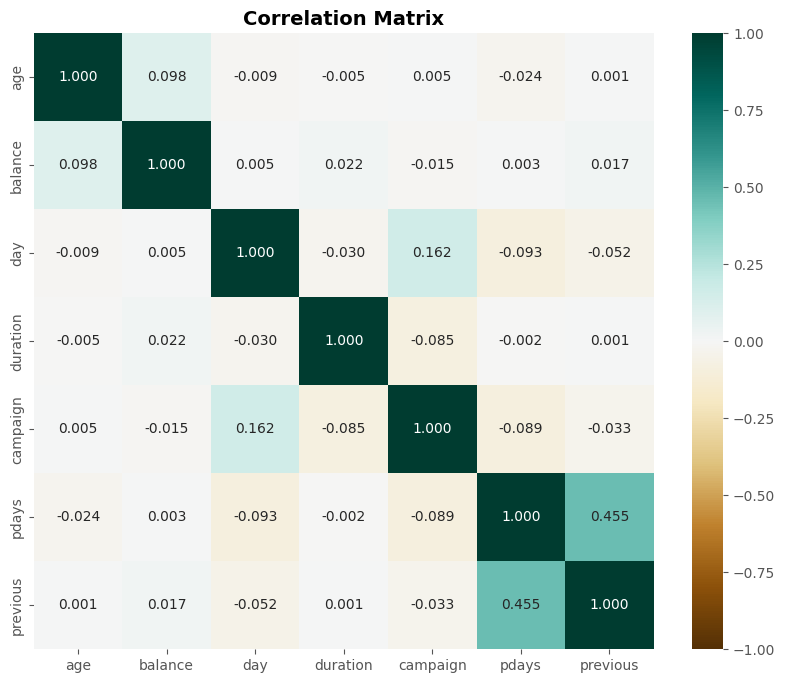

In [30]:
# Calculate the correlation matrix among numerical variables
corr_matrix = df_model[numerical_cols].corr()

# Create a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="BrBG", vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=14, weight="bold")
plt.show()

<Figure size 1400x1200 with 0 Axes>

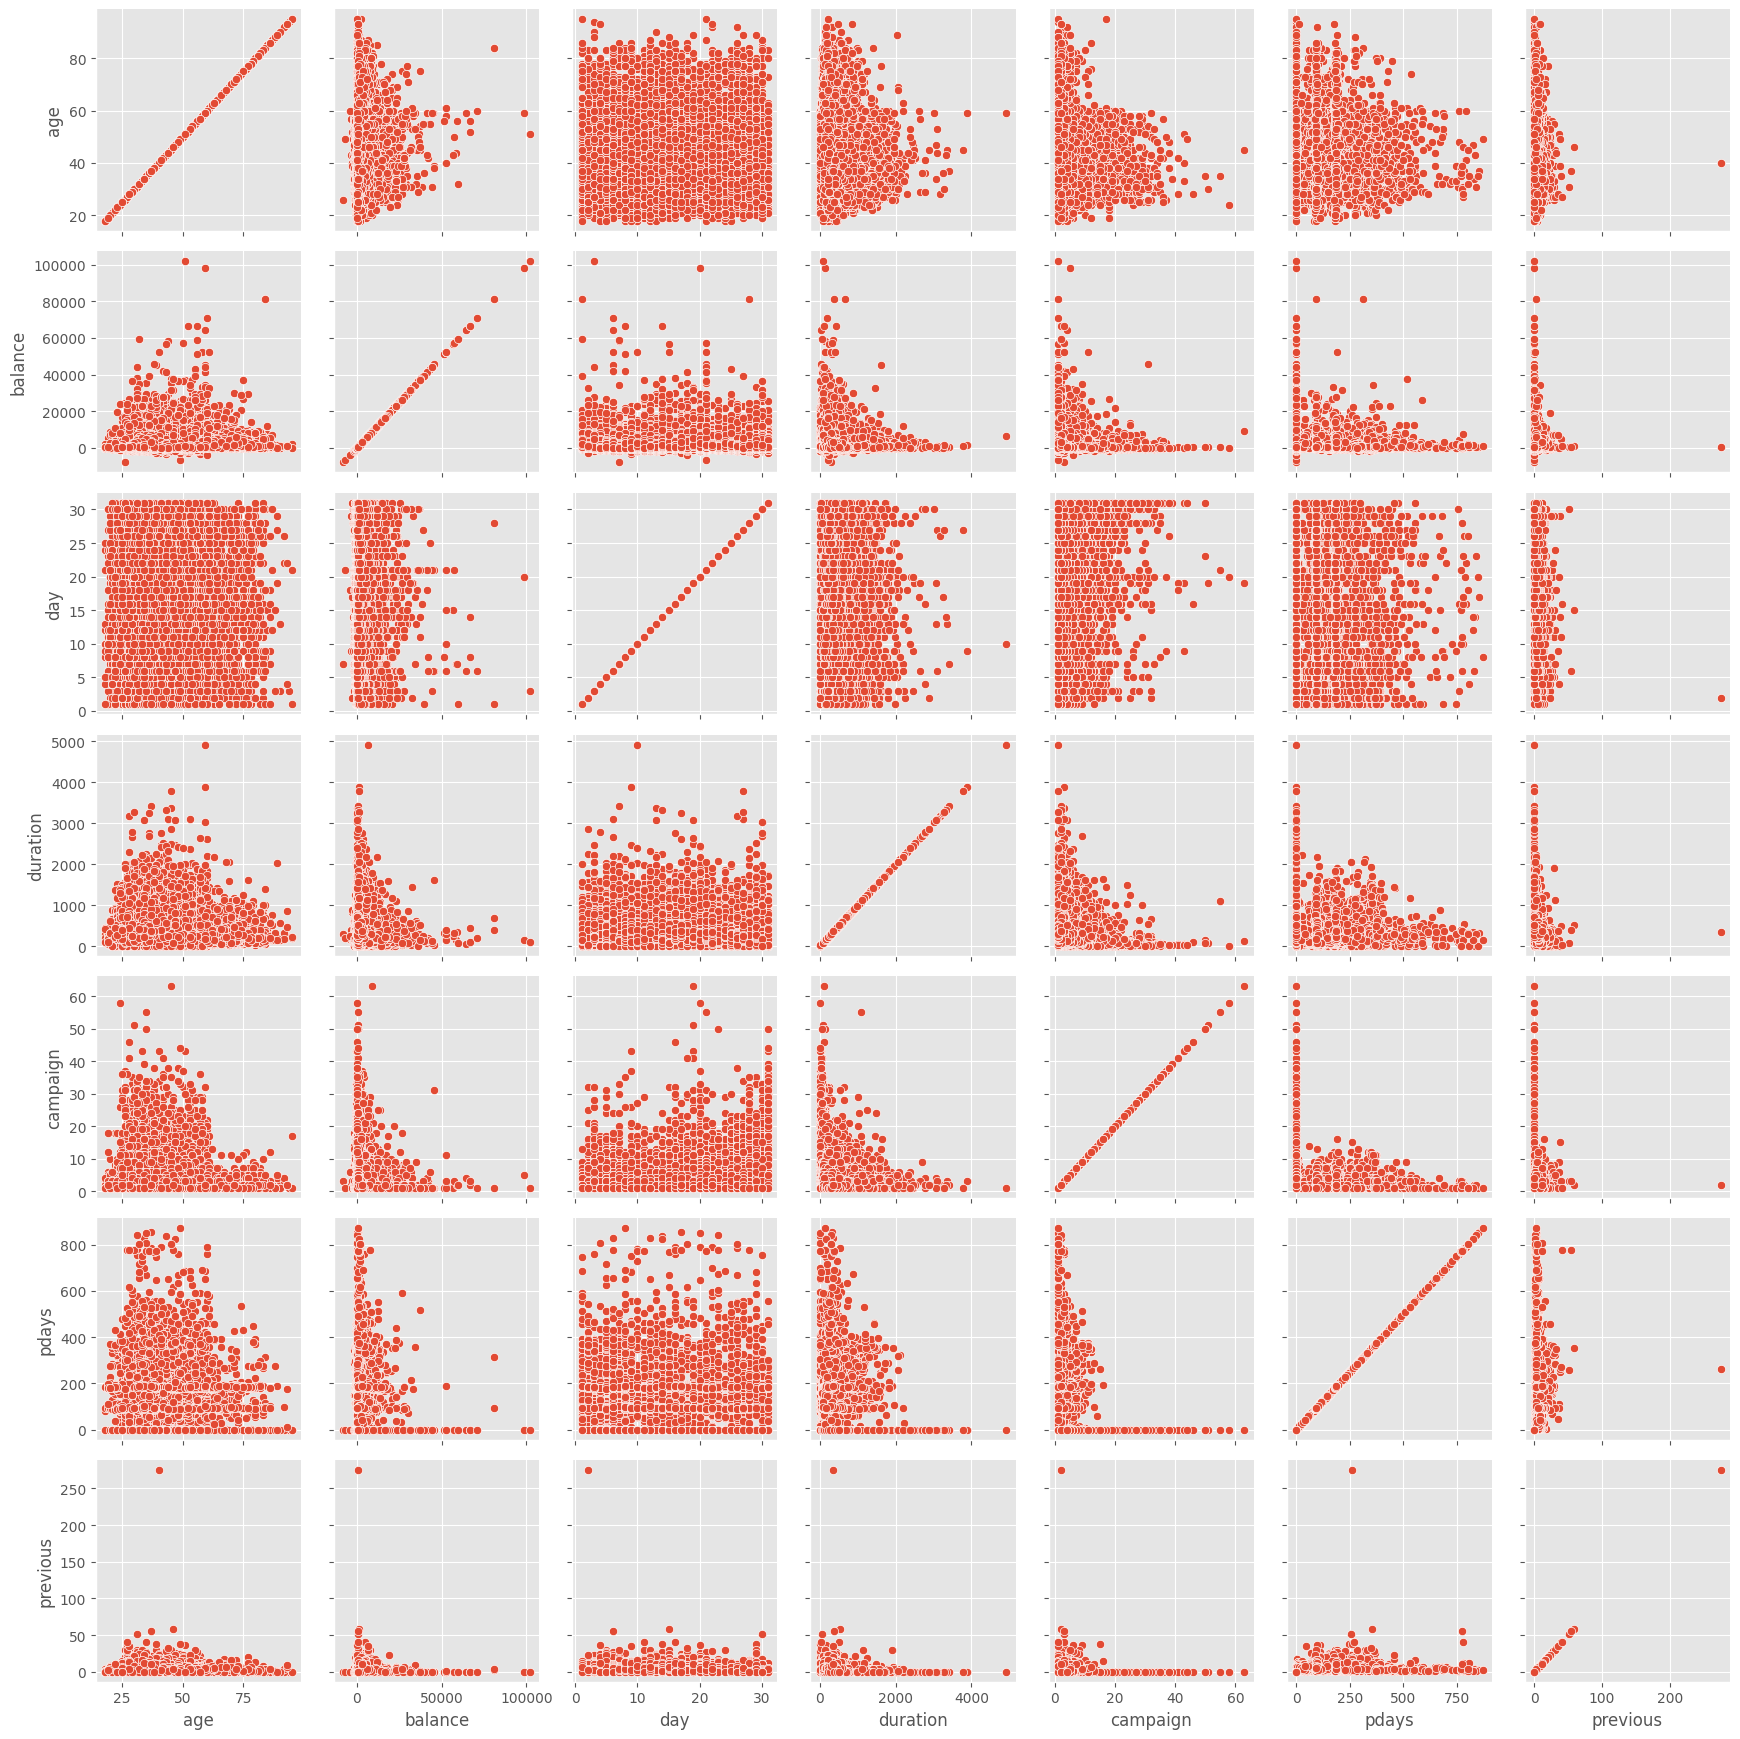

In [31]:
# Set up a PairGrid for scatter plots among numerical columns
plt.figure(figsize=(14, 12))
g = sns.PairGrid(df_model[numerical_cols])
g.map(sns.scatterplot)
plt.tight_layout()
plt.show()

### **4. Modelling**

#### **4.1 Setting up the Training and Testing Framework**

In [32]:
# Split the DataFrame df_model into training and testing sets
df_train, df_test = train_test_split(df_model, test_size=0.2, random_state=13)

In [33]:
# Make sure that the distributions are correct with the total of observations
assert len(df_model) == (len(df_train) + len(df_test))

In [34]:
# Reset the index of the training and testing sets
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [35]:
# Extract the target variable 'subscribed' from the training and testing sets
y_train = df_train['subscribed'].values
y_test = df_test['subscribed'].values

In [36]:
# Drop the target variable 'subscribed' from the training and testing sets
df_train = df_train.drop(columns='subscribed')
df_test = df_test.drop(columns='subscribed')

In [37]:
# Create an instance of the OneHotEncoder with specified parameters
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the OneHotEncoder to the categorical columns in the DataFrame df_model
ohe.fit(df_model[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [38]:
# Transform the categorical columns in the training set using the fitted OneHotEncoder
ohe_train = ohe.transform(df_train[categorical_cols])

# Transform the categorical columns in the testing set using the same OneHotEncoder
ohe_test = ohe.transform(df_test[categorical_cols])

In [40]:
# Get the feature names after one-hot encoding using the fitted OneHotEncoder
categorical_names = ohe.get_feature_names_out()

# Combine one-hot encoded feature names with numerical column names
# The resulting array (all_feature_names) contains the names of all features in the dataset
all_feature_names = np.concatenate([categorical_names, numerical_cols])
all_feature_names

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'age_group_18-30', 'age_group_31-45',
       'age_group_46-60', 'age_group_>60', 'contacted_no',
       'contacted_yes', 'age', 'balance', 'day', 'duration', 'campaign',
       'pdays'

In [41]:
# Combine one-hot encoded features with numerical features in the training set
# The resulting array (X_train) contains all features for model training
X_train = np.column_stack([ohe_train, df_train[numerical_cols].values])

# Combine one-hot encoded features with numerical features in the testing set
# The resulting array (X_test) contains all features for model evaluation
X_test = np.column_stack([ohe_test, df_test[numerical_cols].values])

#### **4.2 Logistic Regression**

In [42]:
# Define a grid of hyperparameters for logistic regression
params_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C':  [0.001, 0.01, 0.1, 0.5, 1, 5, 10]
}

In [46]:
# Create an instance of LogisticRegression for the grid search
# Define the hyperparameter grid, cross-validation (cv) strategy, scoring metric, and other settings
grid_search = GridSearchCV(LogisticRegression(), params_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit the grid search to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc', verbose=1)

In [50]:
# Print the best AUC score and the corresponding best hyperparameters
print("Best AUC Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best AUC Score: 0.909120 using {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [51]:
# Get the best estimator (model) from the grid search
log_reg = grid_search.best_estimator_

#### **4.3 Decision Tree**

In [52]:
# Define a grid of hyperparameters for decision tree
params_grid = {
    'max_depth': list(range(1, 21)),
    'min_samples_leaf': [1, 50, 100, 200, 500, 1000, 2000]
}

In [54]:
# Create an instance of Decision Tree for the grid search
# Define the hyperparameter grid, cross-validation (cv) strategy, scoring metric, and other settings
grid_search = GridSearchCV(DecisionTreeClassifier(), params_grid, cv=5, scoring="roc_auc", verbose=2, n_jobs=-1)

# Fit the grid search to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 50, 100, 200, 500, 1000,
                                              2000]},
             scoring='roc_auc', verbose=1)

In [55]:
# Print the best AUC score and the corresponding best hyperparameters
print("Best AUC Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best AUC Score: 0.904622 using {'max_depth': 18, 'min_samples_leaf': 100}


In [56]:
# Get the best estimator (model) from the grid search
dt = grid_search.best_estimator_

#### **4.4 Random Forest**

In [81]:
# Initialize an empty list to store (n, AUC) tuples
scores = []

# Loop over a range of values for 'n' with a step size of 10
for n in range(10, 201, 10):
    # Create a Random Forest classifier with 'n' estimators and a fixed random state for reproducibility
    rf = RandomForestClassifier(n_estimators=n, random_state=13)
    
    # Train the Random Forest model using training data
    rf.fit(X_train, y_train)

    # Make predictions on the test set and obtain predicted probabilities for class 1
    y_pred = rf.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC (Area Under the ROC Curve) score using true labels and predicted probabilities
    auc = roc_auc_score(y_test, y_pred)
    
    # Append a tuple (n, AUC) to the 'scores' list
    scores.append((n, auc))

In [82]:
# Create a DataFrame from the 'scores' list with columns 'n_trees' and 'auc'
df_scores = pd.DataFrame(scores, columns=['n_trees', 'auc'])
df_scores

,n_trees,auc
0,10,0.886972
1,20,0.907695
2,30,0.913825
3,40,0.916543
4,50,0.919462
5,60,0.921328
6,70,0.921416
7,80,0.922561
8,90,0.923230
9,100,0.923666


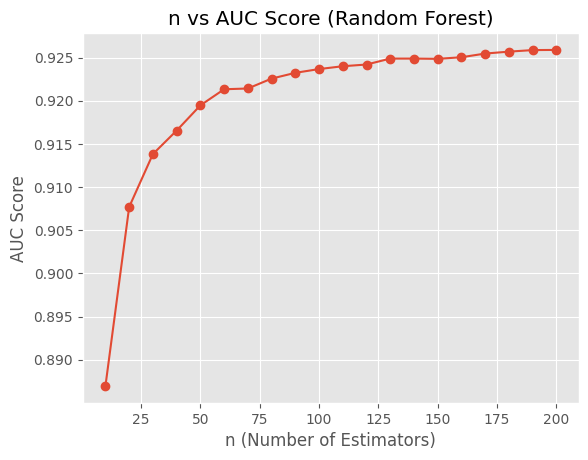

In [83]:
# Plotting the line graph
plt.plot(df_scores['n_trees'], df_scores['auc'], marker='o')
plt.title('n vs AUC Score (Random Forest)')
plt.xlabel('n (Number of Estimators)')
plt.ylabel('AUC Score')
plt.grid(True)
plt.show()

In [70]:
# Define a grid of hyperparameters for random forest
params_grid = {
    'n_estimators': [100],
    'max_depth': list(range(1, 21)),
    'min_samples_leaf': [1, 50, 100, 200, 500, 1000, 2000],
    'random_state': [13]
}

In [71]:
# Create an instance of Random Forest for the grid search
# Define the hyperparameter grid, cross-validation (cv) strategy, scoring metric, and other settings
grid_search = GridSearchCV(RandomForestClassifier(), params_grid, cv=5, scoring="roc_auc", verbose=2, n_jobs=-1)

# Fit the grid search to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 50, 100, 200, 500, 1000, 2000],
                         'n_estimators': [100], 'random_state': [13]},
             scoring='roc_auc', verbose=1)

In [72]:
# Print the best AUC score and the corresponding best hyperparameters
print("Best AUC Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best AUC Score: 0.928145 using {'max_depth': 19, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 13}


In [73]:
# Get the best estimator (model) from the grid search
rf = grid_search.best_estimator_

#### **4.5 XGBoost**

In [75]:
# Initialize an empty list to store (n, AUC) tuples
scores = []

# Loop over a range of values for 'n' with a step size of 10
for n in range(10, 201, 10):
    # Create a XGBoost Random Forest classifier with 'n' estimators and a fixed random state for reproducibility
    xb = XGBRFClassifier(n_estimators=n, objective='binary:logistic', nthread=20, verbosity=1, seed=13)
    
    # Train the XGBoost Random Forest model using training data
    xb.fit(X_train, y_train)

    # Make predictions on the test set and obtain predicted probabilities for class 1
    y_pred = xb.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC (Area Under the ROC Curve) score using true labels and predicted probabilities
    auc = roc_auc_score(y_test, y_pred)
    
    # Append a tuple (n, AUC) to the 'scores' list
    scores.append((n, auc))

In [77]:
# Create a DataFrame from the 'scores' list with columns 'n_trees' and 'auc'
df_scores = pd.DataFrame(scores, columns=['n_trees', 'auc'])
df_scores

,n_trees,auc
0,10,0.886373
1,20,0.890907
2,30,0.891148
3,40,0.891632
4,50,0.891044
5,60,0.891713
6,70,0.892155
7,80,0.892420
8,90,0.892412
9,100,0.892849


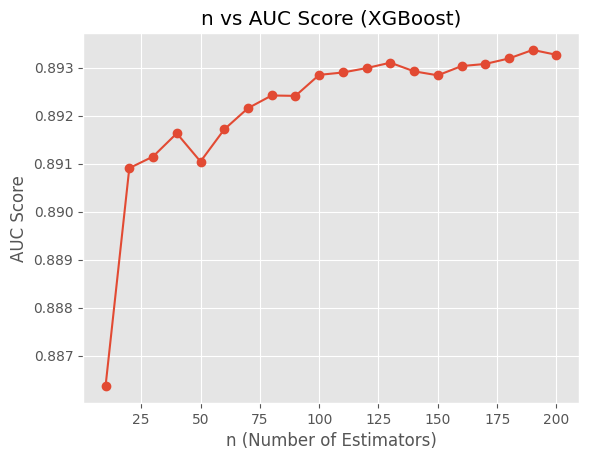

In [80]:
# Plotting the line graph
plt.plot(df_scores['n_trees'], df_scores['auc'], marker='o')
plt.title('n vs AUC Score (XGBoost)')
plt.xlabel('n (Number of Estimators)')
plt.ylabel('AUC Score')
plt.grid(True)
plt.show()

In [84]:
# Define a grid of hyperparameters for XGBoost
params_grid = {
    'n_estimators': [100],
    'eta': [0.01, 0.1, 0.2],
    'max_depth': list(range(1, 21)),
    'min_child_weight': [1, 3, 5, 10],
    'seed': [13],
    'objective': ['binary:logistic'],
    'eval_metric': ['auc'],
    'nthread': [20],
    'verbosity': [1]
}

In [85]:
# Create an instance of XGBoost for the grid search
# Define the hyperparameter grid, cross-validation (cv) strategy, scoring metric, and other settings
grid_search = GridSearchCV(XGBRFClassifier(), params_grid, cv=5, scoring="roc_auc", n_jobs=-1)

# Fit the grid search to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=None, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'eta': [0.01, 0.1, 0.2], 'eval_metric': ['auc'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_child_weight': [1, 3, 5, 10],
                         'n_estimators': [100], 'nthread': [20],
                         'objective': ['binary:logistic'], 'seed': [13],
                         'verbosity': [1]},
             scoring='roc_auc')

In [86]:
# Print the best AUC score and the corresponding best hyperparameters
print("Best AUC Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best AUC Score: 0.927738 using {'eta': 0.01, 'eval_metric': 'auc', 'max_depth': 20, 'min_child_weight': 1, 'n_estimators': 100, 'nthread': 20, 'objective': 'binary:logistic', 'seed': 13, 'verbosity': 1}


In [ ]:
# Get the best estimator (model) from the grid search
xgb = grid_search.best_estimator_

#### **4.6 Best Model**

In [88]:
# Define a list of tuples, each containing the model name and its corresponding instance
models = [
    ('Logistic Regression', log_reg),
    ('Decision Tree', dt),
    ('Random Forest', rf),
    ('XGBoost', xgb)
]

In [89]:
# Define a list to store the results
results = []

# Evaluate each model
for name, model in models:
    # Fit the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate performance metrics
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    auc = round(roc_auc_score(y_test, y_pred_proba), 4)

    # Append results to the 'results' list
    results.append((name, accuracy, precision, recall, f1, auc))

In [91]:
# Create a DataFrame 'comparison_df' using the provided results
comparison_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'])
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.9021,0.6458,0.3605,0.4627,0.9114
1,Decision Tree,0.8977,0.5988,0.3784,0.4638,0.9053
2,Random Forest,0.9069,0.6748,0.3926,0.4964,0.9259
3,XGBoost,0.9021,0.5783,0.6008,0.5893,0.9298


In [92]:
# XGBoost considered as the best model based on the overall evaluation metrics
best_model = xgb

In [93]:
# Create a Repeated Stratified K-Fold cross-validator with 5 splits, 2 repeats, and a fixed random state
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=13)

# Initialize an empty list to store AUC scores for each fold
scores = []

# Extract labels ('y') and features ('X') from the DataFrame 'df_model'
y = df_model['subscribed'].values
X = df_model.drop(columns='subscribed')

# Iterate over folds using the Repeated Stratified K-Fold cross-validator
for fold_num, (train_index, test_index) in enumerate(rskf.split(X, y), 1):
    # Split the data into training and testing sets based on the current fold
    df_train, df_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # One-Hot Encode categorical features for both training and testing sets
    ohe_train = ohe.transform(df_train[categorical_cols])
    ohe_test = ohe.transform(df_test[categorical_cols])
    
    # Combine One-Hot Encoded features with numerical features
    X_train = np.column_stack([ohe_train, df_train[numerical_cols].values])
    X_test = np.column_stack([ohe_test, df_test[numerical_cols].values])
    
    # Fit the best model (assumed to be previously defined) on the training data
    best_model.fit(X_train, y_train)
    
    # Generate predicted probabilities for the positive class on the test set
    y_pred = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate and round the AUC score for the current fold
    score = roc_auc_score(y_test, y_pred).round(4)
    
    # Append the AUC score to the 'scores' list
    scores.append(score)
    
    # Print the AUC score for the current fold
    print(f"AUC Score for fold {fold_num}: {score}")

# Calculate and round the average AUC score across all folds
average_score = np.mean(scores).round(4)

# Print the average AUC score across all folds
print(f"\nAverage AUC Score across all folds: {average_score}")

AUC Score for fold 1: 0.9322
AUC Score for fold 2: 0.9258
AUC Score for fold 3: 0.9288
AUC Score for fold 4: 0.9336
AUC Score for fold 5: 0.9307
AUC Score for fold 6: 0.9236
AUC Score for fold 7: 0.9273
AUC Score for fold 8: 0.9345
AUC Score for fold 9: 0.9326
AUC Score for fold 10: 0.9307

Average AUC Score across all folds: 0.93


In [65]:
# Fit the best model on the training data
best_model.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False, eta=0.01,
                eval_metric='auc', feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=20, max_leaves=None,
                min_child_weight=1, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=None, nthread=20,
                num_parallel_tree=None, objective='binary:logistic', ...)

In [94]:
# Generate predictions on the test set using the trained model
y_pred = best_model.predict(X_test)

# Generate predicted probabilities for the positive class on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [95]:
# Compute the confusion matrix based on true labels (y_test) and predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object for visualization, providing the confusion matrix (cm) and display labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Subscribed", "Subscribed"])

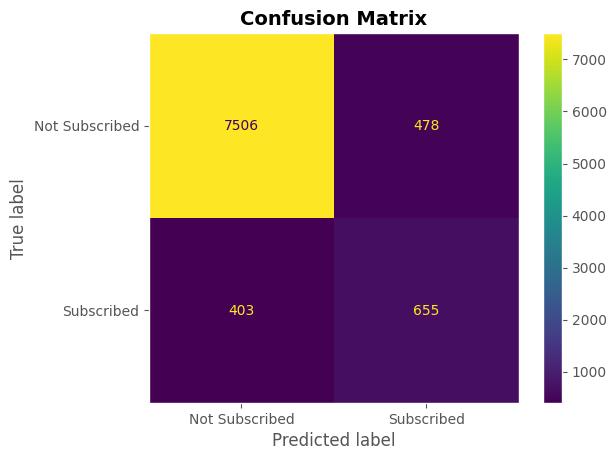

In [96]:
# Plot the confusion matrix using the ConfusionMatrixDisplay object
disp.plot()
plt.title("Confusion Matrix", fontsize=14, weight="bold")
plt.grid(visible=False)
plt.show()

In [97]:
# Calculate various classification metrics for model evaluation
# - Accuracy: the proportion of correctly classified instances
# - Precision: the proportion of true positive predictions among all positive predictions
# - Recall: the proportion of true positive predictions among all actual positives
# - F1 Score: the harmonic mean of precision and recall, providing a balance between the two
# - AUC (Area Under the ROC Curve): the area under the Receiver Operating Characteristic curve, 
#   measuring the model's ability to distinguish between positive and negative instances

# Calculate and round the accuracy score
accuracy = round(accuracy_score(y_test, y_pred), 4)

# Calculate and round the precision score
precision = round(precision_score(y_test, y_pred), 4)

# Calculate and round the recall score
recall = round(recall_score(y_test, y_pred), 4)

# Calculate and round the F1 score
f1 = round(f1_score(y_test, y_pred), 4)

# Calculate and round the AUC score using predicted probabilities
auc = round(roc_auc_score(y_test, y_pred_proba), 4)

# Create a tuple ('metrics') containing all calculated metrics
metrics = (accuracy, precision, recall, f1, auc)

In [98]:
# Create the DataFrame with metrics as data, metric names as index, and model name as the column name
evaluation_df = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'], columns=['XGBoost'])
evaluation_df

,XGBoost
Accuracy,0.9026
Precision,0.5781
Recall,0.6191
F1 Score,0.5979
AUC Score,0.9307


In [100]:
# Create the list by zipping together feature names and their importance scores
feature_importance = list(zip(all_feature_names, best_model.feature_importances_))

In [101]:
# Create the DataFrame for feature importances
fi_df = pd.DataFrame(feature_importance, columns=['Feature', 'Weight'])

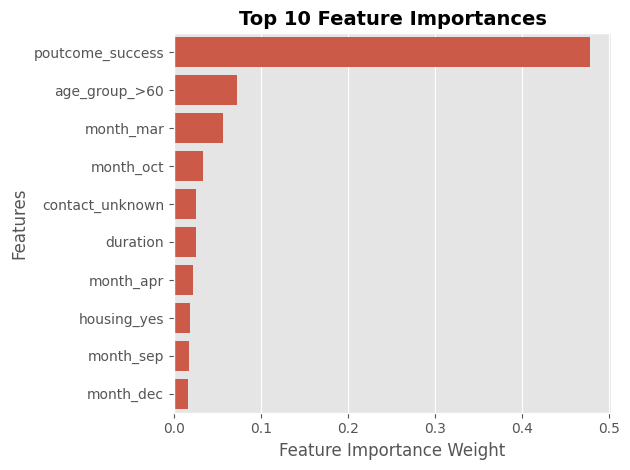

In [102]:
# Sort the DataFrame by the "Weight" column in descending order and select the top 10 rows
top10_fi = fi_df.sort_values("Weight", ascending=False).head(10)

# Create a bar plot using Seaborn to visualize the top 10 feature importances
sns.barplot(data=top10_fi, y="Feature", x="Weight")

plt.xlabel("Feature Importance Weight")
plt.ylabel("Features")
plt.title("Top 10 Feature Importances", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

In [103]:
# Save the trained XGBoost model and associated preprocessing objects to a binary fil
output_file = f'xgboost_model.bin'

with open(output_file, 'wb') as f_out:
    pickle.dump((ohe, best_model), f_out